# Baseline solution

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder
from sklearn.tree import *

In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
data = pd.read_csv("C:\\Users\\Asus\\Downloads\\tabular-minicap-1-main\\tabular-minicap-1-main\\train.csv")

In [4]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,76466,Sales & Marketing,region_31,Bachelor's,f,other,1,34,3.0,7,0,0,52,0
1,46459,Technology,region_2,Bachelor's,f,other,1,50,3.0,19,0,0,76,0
2,11890,Technology,region_7,Bachelor's,m,other,1,40,3.0,7,0,0,79,0
3,76483,Sales & Marketing,region_2,Bachelor's,f,sourcing,1,33,5.0,6,0,0,48,0
4,63365,Procurement,region_17,Bachelor's,f,other,1,34,3.0,8,0,0,67,0


In [5]:
#random 10 columns
data.sample(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
20799,31274,Operations,region_22,Bachelor's,f,sourcing,2,34,3.0,3,1,0,64,1
9939,51180,Procurement,region_26,Master's & above,m,other,1,40,1.0,7,0,0,70,0
10672,22584,Technology,region_15,Bachelor's,f,other,2,34,3.0,7,0,0,81,0
11961,40682,Technology,region_2,Bachelor's,m,other,1,45,2.0,18,0,0,78,0
3015,24992,Operations,region_15,Bachelor's,f,sourcing,1,40,5.0,7,1,0,60,0
20821,68925,Analytics,region_22,Master's & above,m,other,2,42,3.0,4,0,0,81,0
19089,45052,Procurement,region_13,Master's & above,f,other,2,40,3.0,12,0,0,68,0
35965,29550,Sales & Marketing,region_29,Master's & above,m,other,1,44,3.0,6,0,0,50,0
17211,19194,Procurement,region_22,Bachelor's,m,other,4,29,3.0,5,0,0,69,0
37598,54306,Sales & Marketing,region_29,Bachelor's,f,other,2,29,3.0,1,0,0,49,0


In [6]:
data.shape

(43846, 14)

In [7]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
# Size of data.

print((data.memory_usage().sum()/(1024*1024)).round(2),"MB")

4.68 MB


In [9]:
data.employee_id.value_counts().sum()

43846

##### 	employee_id column is unique feature(number of columns = 	employee_id) so we can drop it

In [10]:
data.drop(['employee_id'],axis=1,inplace=True)

In [11]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_31,Bachelor's,f,other,1,34,3.0,7,0,0,52,0
1,Technology,region_2,Bachelor's,f,other,1,50,3.0,19,0,0,76,0
2,Technology,region_7,Bachelor's,m,other,1,40,3.0,7,0,0,79,0
3,Sales & Marketing,region_2,Bachelor's,f,sourcing,1,33,5.0,6,0,0,48,0
4,Procurement,region_17,Bachelor's,f,other,1,34,3.0,8,0,0,67,0


## Plan
### Classification Problem

In [12]:
'''
Requirements for model fitting by sklearn.
1. No Missing values.
2. No categorical columns.

'''


'\nRequirements for model fitting by sklearn.\n1. No Missing values.\n2. No categorical columns.\n\n'

In [13]:
# Find and fill null values

data.isnull().sum()

department                 0
region                     0
education               1941
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3325
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [14]:
data.isnull().mean()*1000

department               0.000000
region                   0.000000
education               44.268576
gender                   0.000000
recruitment_channel      0.000000
no_of_trainings          0.000000
age                      0.000000
previous_year_rating    75.833599
length_of_service        0.000000
KPIs_met >80%            0.000000
awards_won?              0.000000
avg_training_score       0.000000
is_promoted              0.000000
dtype: float64

##### previous_year_rating feature has more null values = 75%

In [15]:
data.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [16]:
data.duplicated().value_counts()

False    43764
True        82
dtype: int64

In [17]:
'''
Column Transformation

simple imputer = education , previous_year_rating  
ordinalEncoder = education (nan = 0 ,'Below Secondary' = 1, "Bachelor's" = 3, "Master's & above" = 4)
OnehotEncoder = department , region, gender , recruitment_channel 

'''

'\nColumn Transformation\n\nsimple imputer = education , previous_year_rating  \nordinalEncoder = education (nan = 0 ,\'Below Secondary\' = 1, "Bachelor\'s" = 3, "Master\'s & above" = 4)\nOnehotEncoder = department , region, gender , recruitment_channel \n\n'

In [18]:
data['education']

0              Bachelor's
1              Bachelor's
2              Bachelor's
3              Bachelor's
4              Bachelor's
               ...       
43841    Master's & above
43842          Bachelor's
43843    Master's & above
43844          Bachelor's
43845          Bachelor's
Name: education, Length: 43846, dtype: object

In [19]:
#Filling missing values 
#1. numeric feature's missing values

data.fillna(data.mean(numeric_only=True).round(1), inplace=True) 

In [20]:
#2. categorical features missing values

data = data.fillna(data.mode().iloc[0])

In [21]:
data.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [22]:
categorical_cols = data.select_dtypes(include=['object']).columns

In [23]:
categorical_cols

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [24]:
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [25]:
data.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1,34,3.0,7,0,0,52,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,50,3.0,19,0,0,76,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,40,3.0,7,0,0,79,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,33,5.0,6,0,0,48,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,34,3.0,8,0,0,67,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Data spiliting
train_size = 35076
test_size = 4385
holdout_size = 4385

temp_x,holdout_x,temp_y,holdout_y  = train_test_split(data.drop(['is_promoted'],axis=1), data['is_promoted'] , test_size=holdout_size, random_state=121, stratify = data['is_promoted'] )

In [27]:
temp_x.shape , holdout_x.shape

((39461, 53), (4385, 53))

In [28]:
train_x,test_x,train_y,test_y = train_test_split(temp_x,temp_y , test_size = test_size , random_state=121)

In [29]:
train_x.shape , test_x.shape , holdout_x.shape

((35076, 53), (4385, 53), (4385, 53))

In [42]:
train_y.sum()/train_y.shape[0]

0.08498688561979702

In [43]:
test_y.sum()/test_y.shape[0]

0.08665906499429875

## baseline model fitting

In [30]:
#2 - Decision Tree Classifier gives better f1 score so we go with Decision tree Classifier

model = DecisionTreeClassifier()

In [31]:
model.fit(train_x,train_y)

DecisionTreeClassifier()

In [32]:
test_pred = model.predict(test_x)

In [33]:
test_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
print(classification_report(test_y,test_pred)) 

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4005
           1       0.41      0.44      0.43       380

    accuracy                           0.90      4385
   macro avg       0.68      0.69      0.68      4385
weighted avg       0.90      0.90      0.90      4385



In [35]:
holdout_pred = model.predict(holdout_x)

In [36]:
print(classification_report(holdout_y,holdout_pred)) 

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4012
           1       0.38      0.40      0.39       373

    accuracy                           0.89      4385
   macro avg       0.66      0.67      0.66      4385
weighted avg       0.90      0.89      0.89      4385



In [37]:
train_pred = model.predict(train_x)

In [38]:
print(classification_report(train_y,train_pred)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32095
           1       1.00      1.00      1.00      2981

    accuracy                           1.00     35076
   macro avg       1.00      1.00      1.00     35076
weighted avg       1.00      1.00      1.00     35076



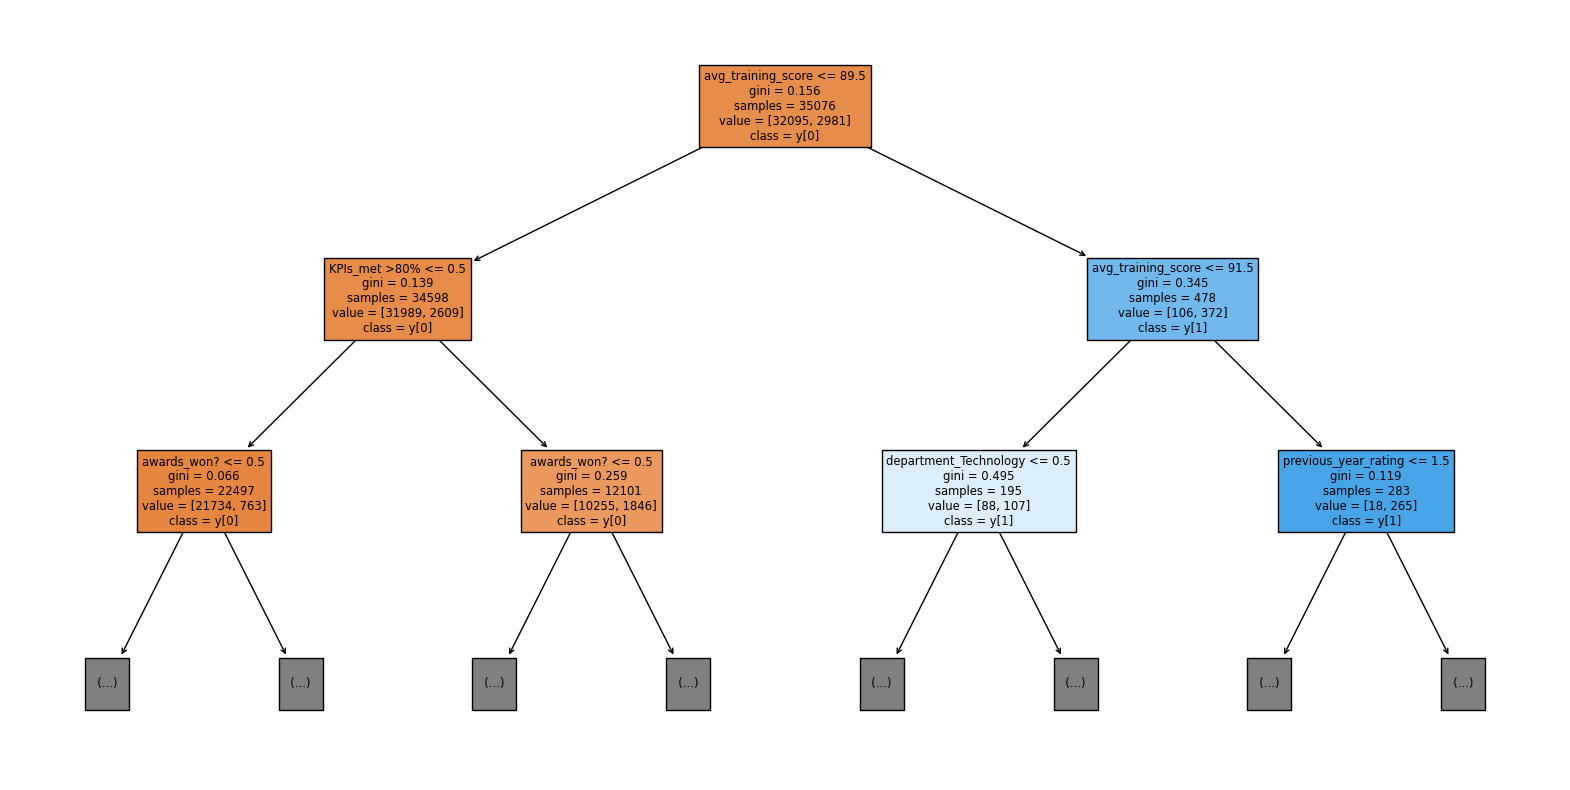

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(model,feature_names=data.drop('is_promoted',axis=1).columns,max_depth = 2,filled=True,class_names = True)
plt.show()

####  This is the baseline solution. Preprocessing is avoided because to represent True Decision Tree. It can be done in iterative solution to incrase accuracy 